# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [170]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [171]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

In [172]:
print(cities)

['ushuaia', 'rikitea', 'hualmay', 'ostrovnoy', 'avera', 'albany', 'luganville', 'new norfolk', 'nuuk', 'sinuapa', 'ola', 'san cristobal', 'usinsk', 'kamenskoye', 'huilong', 'plouzane', 'mandalgovi', 'vestmannaeyjar', 'kharan', 'ust-omchug', 'cabo san lucas', 'illoqqortoormiut', 'poum', 'bluff', 'pevek', 'arraial do cabo', 'juterbog', 'mataura', 'skibotn', 'hare bay', 'antalaha', 'kalengwa', 'touros', 'vanimo', 'dundalk', 'prado', 'belushya guba', 'lorengau', 'ilulissat', 'ponta do sol', 'hobart', 'port alfred', 'taolanaro', 'miraflores', 'grindavik', 'liniere', 'iqaluit', 'luderitz', 'mahebourg', 'uribia', 'mecca', 'fortuna', 'elat', 'cayenne', 'izyaslav', 'comodoro rivadavia', 'vaini', 'komsomolskiy', 'hermanus', 'fare', 'yingcheng', 'santa marta', 'khatanga', 'qaanaaq', 'butaritari', 'kapaa', 'ampanihy', 'whitehorse', 'bethel', 'urubamba', 'punta arenas', 'faanui', 'souillac', 'sampit', 'dingle', 'burewala', 'anadyr', 'busselton', 'jiddah', 'lindi', 'carnarvon', 'tuktoyaktuk', 'olden

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [173]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url =f"{url}&units={units}&appid={weather_api_key}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=a8408b6e1ea2314fd02eb179a23ae369&q=


In [174]:
time.sleep(1)
#setting up several lists to hold the weather info (based on teh HW CSV)
city_id =[]
city_name = []
cloudiness = []
country = []
date =[]
humidity =[]
Lat =[]
Lng =[]
max_temp = []
wind_speed = []
count= 0
set_count =1
record_count = 0

pprint(cities)                  
    

['ushuaia',
 'rikitea',
 'hualmay',
 'ostrovnoy',
 'avera',
 'albany',
 'luganville',
 'new norfolk',
 'nuuk',
 'sinuapa',
 'ola',
 'san cristobal',
 'usinsk',
 'kamenskoye',
 'huilong',
 'plouzane',
 'mandalgovi',
 'vestmannaeyjar',
 'kharan',
 'ust-omchug',
 'cabo san lucas',
 'illoqqortoormiut',
 'poum',
 'bluff',
 'pevek',
 'arraial do cabo',
 'juterbog',
 'mataura',
 'skibotn',
 'hare bay',
 'antalaha',
 'kalengwa',
 'touros',
 'vanimo',
 'dundalk',
 'prado',
 'belushya guba',
 'lorengau',
 'ilulissat',
 'ponta do sol',
 'hobart',
 'port alfred',
 'taolanaro',
 'miraflores',
 'grindavik',
 'liniere',
 'iqaluit',
 'luderitz',
 'mahebourg',
 'uribia',
 'mecca',
 'fortuna',
 'elat',
 'cayenne',
 'izyaslav',
 'comodoro rivadavia',
 'vaini',
 'komsomolskiy',
 'hermanus',
 'fare',
 'yingcheng',
 'santa marta',
 'khatanga',
 'qaanaaq',
 'butaritari',
 'kapaa',
 'ampanihy',
 'whitehorse',
 'bethel',
 'urubamba',
 'punta arenas',
 'faanui',
 'souillac',
 'sampit',
 'dingle',
 'burewala',
 

In [175]:
#Loop through cities, append them to the relevant lists and print out the outcome 
for city in cities:
    time.sleep(1)
    count= count + 1 
    
    
    try:
        
        response =requests.get(query_url + city).json()
        city_id.append(response["id"])
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        Lat.append(response["coord"]["lat"])
        Lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
 # start a new set every 50 cities       
        if count > 49:
            count =0
            set_count+= 1
                          
        
            
        else:                  
            print(f"processing Record {count} of set {set_count}| {city}")  
    except(KeyError, IndexError):
        print("City not found, skipping")
        

processing Record 1 of set 1| ushuaia
processing Record 2 of set 1| rikitea
processing Record 3 of set 1| hualmay
processing Record 4 of set 1| ostrovnoy
processing Record 5 of set 1| avera
processing Record 6 of set 1| albany
processing Record 7 of set 1| luganville
processing Record 8 of set 1| new norfolk
processing Record 9 of set 1| nuuk
processing Record 10 of set 1| sinuapa
processing Record 11 of set 1| ola
processing Record 12 of set 1| san cristobal
processing Record 13 of set 1| usinsk
City not found, skipping
processing Record 15 of set 1| huilong
processing Record 16 of set 1| plouzane
processing Record 17 of set 1| mandalgovi
processing Record 18 of set 1| vestmannaeyjar
processing Record 19 of set 1| kharan
processing Record 20 of set 1| ust-omchug
processing Record 21 of set 1| cabo san lucas
City not found, skipping
processing Record 23 of set 1| poum
processing Record 24 of set 1| bluff
processing Record 25 of set 1| pevek
processing Record 26 of set 1| arraial do cab

processing Record 16 of set 5| sitka
processing Record 17 of set 5| ribeira grande
processing Record 18 of set 5| muroto
processing Record 19 of set 5| shaunavon
processing Record 20 of set 5| kuching
processing Record 21 of set 5| petropavlovsk-kamchatskiy
processing Record 22 of set 5| cintalapa
processing Record 23 of set 5| lamar
processing Record 24 of set 5| sovetskaya
processing Record 25 of set 5| mangan
processing Record 26 of set 5| henties bay
processing Record 27 of set 5| berlevag
processing Record 28 of set 5| murgab
processing Record 29 of set 5| hithadhoo
processing Record 30 of set 5| huangpi
processing Record 31 of set 5| chabahar
processing Record 32 of set 5| bubaque
processing Record 33 of set 5| virginia beach
City not found, skipping
processing Record 35 of set 5| vardo
processing Record 36 of set 5| izhma
processing Record 37 of set 5| waw
processing Record 38 of set 5| okhotsk
processing Record 39 of set 5| poyarkovo
processing Record 40 of set 5| twentynine pa

processing Record 31 of set 9| podor
processing Record 32 of set 9| saint-augustin
City not found, skipping
processing Record 34 of set 9| pingliang
processing Record 35 of set 9| santa isabel do rio negro
processing Record 36 of set 9| maniitsoq
City not found, skipping
processing Record 38 of set 9| bulgan
processing Record 39 of set 9| lumsden
processing Record 40 of set 9| lasa
processing Record 41 of set 9| abu dhabi
processing Record 42 of set 9| praia da vitoria
processing Record 43 of set 9| varde
processing Record 44 of set 9| coahuayana
processing Record 45 of set 9| asau
processing Record 46 of set 9| tabou
processing Record 47 of set 9| alice springs
processing Record 48 of set 9| cockburn town
processing Record 49 of set 9| smoky lake
processing Record 1 of set 10| aba
processing Record 2 of set 10| kushmurun
processing Record 3 of set 10| karasburg
processing Record 4 of set 10| arlit
City not found, skipping
processing Record 6 of set 10| hami
processing Record 7 of set 

In [176]:
#make a datafreame with the lists that are made
my_weather_data= pd.DataFrame({"City_ID": city_id , "City" : city_name, "Cloudiness" :cloudiness , "Country": country, "Date": date, "Humidity":humidity, "Lat": Lat, "Lng": Lng, "Max Temp":max_temp , "Wind Speed": wind_speed})
my_weather_data.head(20)

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,3833367,Ushuaia,20,AR,1603764187,39,-54.80,-68.30,48.20,18.34
1,4030556,Rikitea,100,PF,1603764188,86,-23.12,-134.97,75.38,14.34
2,3939761,Hualmay,79,PE,1603764189,82,-11.10,-77.61,63.93,8.14
3,556268,Ostrovnoy,100,RU,1603764164,94,68.05,39.51,41.43,23.94
4,4231997,Avera,40,US,1603764191,90,33.19,-82.53,64.40,3.85
5,5106841,Albany,100,US,1603763992,89,42.60,-73.97,51.01,1.50
6,2136150,Luganville,40,VU,1603764193,66,-15.53,167.17,84.20,11.41
7,2155415,New Norfolk,88,AU,1603764195,48,-42.78,147.06,59.00,3.00
8,3421319,Nuuk,93,GL,1603764196,63,64.18,-51.72,28.40,4.70
9,3601282,Sinuapa,88,HN,1603764197,90,14.45,-89.18,66.67,2.13


## Convert Raw Data to DataFrame
* Save as csv

In [180]:

my_weather_data.to_csv(output_data_file, index= False) #, index_label ="City_ID")

In [187]:
#corrected-data_path = 'weatherAPI_data.csv'
corrected_data_path = "../output_data/cities.csv"

corrected_data_df = pd.read_csv(corrected_data_path)
corrected_data_df.head(20)

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,3833367,Ushuaia,20,AR,1603764187,39,-54.80,-68.30,48.20,18.34
1,4030556,Rikitea,100,PF,1603764188,86,-23.12,-134.97,75.38,14.34
2,3939761,Hualmay,79,PE,1603764189,82,-11.10,-77.61,63.93,8.14
3,556268,Ostrovnoy,100,RU,1603764164,94,68.05,39.51,41.43,23.94
4,4231997,Avera,40,US,1603764191,90,33.19,-82.53,64.40,3.85
5,5106841,Albany,100,US,1603763992,89,42.60,-73.97,51.01,1.50
6,2136150,Luganville,40,VU,1603764193,66,-15.53,167.17,84.20,11.41
7,2155415,New Norfolk,88,AU,1603764195,48,-42.78,147.06,59.00,3.00
8,3421319,Nuuk,93,GL,1603764196,63,64.18,-51.72,28.40,4.70
9,3601282,Sinuapa,88,HN,1603764197,90,14.45,-89.18,66.67,2.13


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

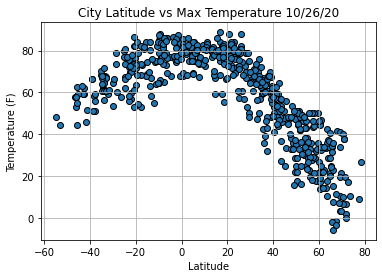

In [186]:
date = time.strftime("%m/%d/%y") 
lat_data = corrected_data_df["Lat"]
temp_data = corrected_data_df["Max Temp"]
plt.scatter(lat_data, temp_data, marker ="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)
plt.title(f"City Latitude vs Max Temperature {date}")
plt.savefig("../output_data/Lat_vs_temp.png")
plt.show()

### Latitude vs. Humidity Plot

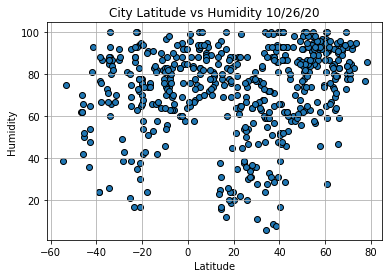

In [192]:
hume_data = corrected_data_df["Humidity"]
plt.scatter(lat_data, hume_data, marker ="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
plt.title(f"City Latitude vs Humidity {date}")
plt.savefig("../output_data/Lat_vs_hume.png")
plt.show()

### Latitude vs. Cloudiness Plot

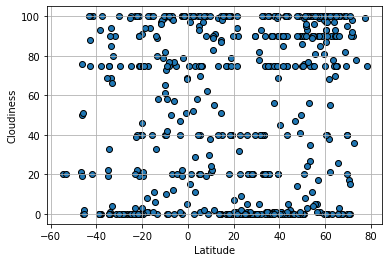

In [191]:
cloud_data = corrected_data_df["Cloudiness"]
plt.scatter(lat_data, cloud_data, marker ="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
plt.title(f"City Latitude vs Cloudiness {date}")
plt.savefig("../output_data/Lat_vs_cloud.png")
plt.show()

### Latitude vs. Wind Speed Plot

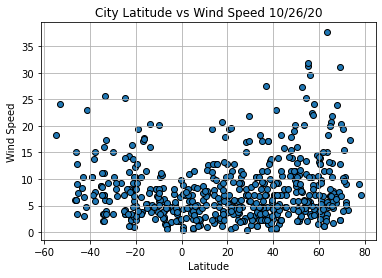

In [193]:
hume_data = corrected_data_df["Wind Speed"]
plt.scatter(lat_data, hume_data, marker ="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
plt.title(f"City Latitude vs Wind Speed {date}")
plt.savefig("../output_data/Lat_vs_Wind_Speed.png")
plt.show()

## Linear Regression

### Write linear regression plot function (optional)

In [194]:
def linear_regression(x,y,y_label,coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")
    print(f"the r-value is : {rvalue**2}")
    plt.xlabel('Latitutde')
    plt.ylabel(y_label)
    plt.show()


###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

the r-value is : 0.7833009479548465


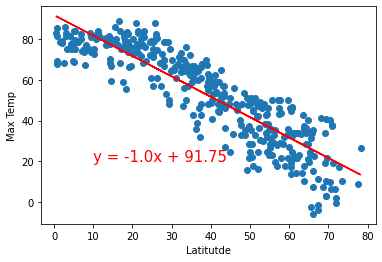

In [196]:
#make a regin with lat (0,80)
#Correlating the 
nh_mt = corrected_data_df[corrected_data_df["Lat"] >=0]
nh_mt

    
x= nh_mt["Lat"]
y= nh_mt["Max Temp"]
linear_regression(x,y,"Max Temp",(10,20))

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

the r-value is : 0.5018228975928828


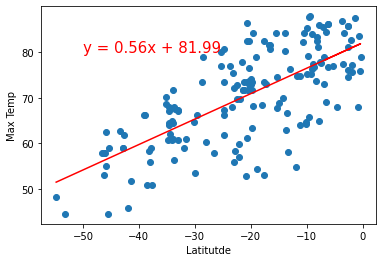

In [198]:
sh_mt = corrected_data_df[corrected_data_df["Lat"] < 0]
sh_mt

x= sh_mt["Lat"]
y= sh_mt["Max Temp"]
linear_regression(x,y,"Max Temp",(-50,80))

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the r-value is : 0.05651631113052147


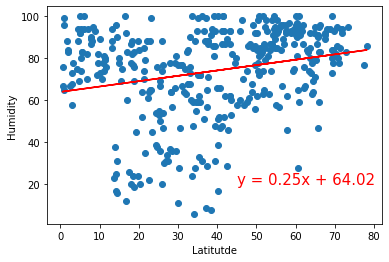

In [201]:
x= nh_mt["Lat"]
y= nh_mt["Humidity"]
linear_regression(x,y,"Humidity",(45,20))

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the r-value is : 0.04269780836222893


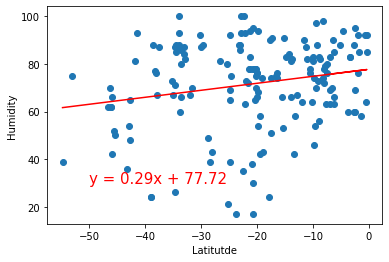

In [203]:
x= sh_mt["Lat"]
y= sh_mt["Humidity"]
linear_regression(x,y,"Humidity",(-50,30))

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the r-value is : 0.02874432277973422


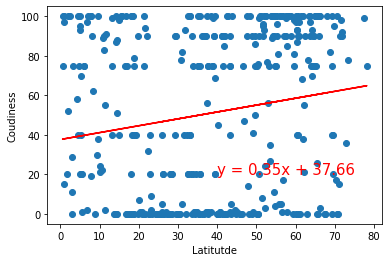

In [204]:
x= nh_mt["Lat"]
y= nh_mt["Cloudiness"]
linear_regression(x,y,"Coudiness",(40,20))

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the r-value is : 0.04138925311510168


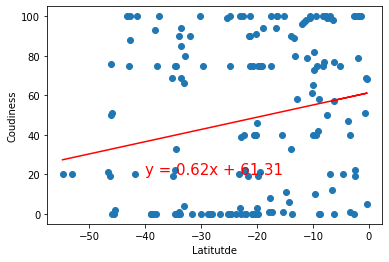

In [205]:
x= sh_mt["Lat"]
y= sh_mt["Cloudiness"]
linear_regression(x,y,"Coudiness",(-40,20))

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the r-value is : 0.05704786112582802


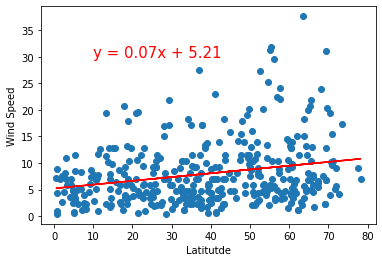

In [208]:
x= nh_mt["Lat"]
y= nh_mt["Wind Speed"]
linear_regression(x,y,"Wind Speed",(10,30))

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the r-value is : 0.09949599494501737


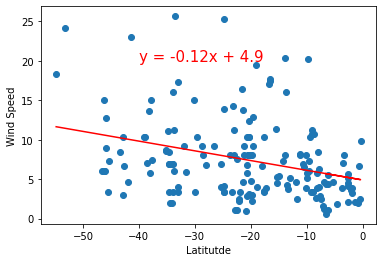

In [207]:
x= sh_mt["Lat"]
y= sh_mt["Wind Speed"]
linear_regression(x,y,"Wind Speed",(-40,20))